# Instructions for running the notebook. Thank you :)

**Step 1.**
Open shared folder [nlp_lib](https://drive.google.com/drive/folders/1ZkF4hnx3siKBlB7j6pElsBY-TfC3n1JE?usp=sharing)

**Step 2.** Add Shortcut to "My Drive".
* See steps [here](https://github.com/googlecolab/colabtools/issues/1694#issuecomment-723894598) or video tutorial [here](https://youtu.be/DyOC7p41RJQ).


**Step 3.** Mount your Google Drive by running the code cell below. The code will be availble in the left pannel/files under `gdrive > My Drive > nlp_lib`

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive/')


Mounted at /content/gdrive


# **Background**

Welcome to the C4AI Scholars Program Take-Home Challenge! This exercise is designed to allow you to showcase your engineering and problem solving skills. The Challenge consists of different challenges including:

*   Identifying bugs, and getting the code working. This is designed to test your ability to grapple with real world engineering challenges.
*   Testing your ability to generate code for a specified problem.
*   An opportunity for you to attempt an optional challenge question that extends the original problem set.

These tasks were chosen as a setting to see how you think about problems, even if they are not in your own research field of interest. The tasks and dataset are not meant to be indicative of the research goals of the Scholar Program. We purposefully have selected a simple toy problem so the focus is on how you think, and does not require significant machine learning resources (can be run in this colab).

Good luck!

**How to Use and Submit this Document?**

*   **Make a copy of this document** and rename it **Firstname_Lastname_C4AIScholarsChallenge**
*   Once you have completed all tasks, save and pin your revisions
*   Submit the assignment by responding directly to the email you received (please reply all) with a link to your final document by Friday September 29th at 12pm PDT.

# **Universal sentence embeddings background [2 points]**
We will be exploring different ways of learning sentence embeddings. Sentence embedding is the collective name for a set of techniques in natural language processing (NLP) where sentences are mapped to vectors of real numbers. For an overview of sentence embeddings and some common methods, we refer these articles: [link1](https://txt.cohere.com/sentence-word-embeddings/), [link2](https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a)  

Q1: What are some real-world applications of dense sentence embeddings?

Answer:

1. Semantic Search: Improving search engines by finding content based on meaning, not just keyword matches.
2. Document Clustering: Grouping text documents based on their semantic content.
3. Text Summarization: Generating concise summaries by understanding the context of longer texts.
4. Question Answering: Finding the most relevant answers to a given question from a large dataset.
5. Sentiment Analysis: Determining the sentiment of a sentence.
6. Machine Translation: Aiding in translating one language to another by capturing semantic nuances.
7. Chatbots & Virtual Assistants: Enhancing natural language understanding for better user interactions.
8. Content Recommendation: Recommending articles, news, or products based on semantic content.
9. Anomaly Detection: Identifying unusual patterns in texts for applications like fraud detection.

Q2: Apart from using large language models, what are other ways to compute sentence embeddings?

Answer:

1. Average Word Embeddings: Compute embeddings for individual words using models like Word2Vec or GloVe and then average them to get a sentence representation.
2. TF-IDF Weighted Averaging: Weight individual word embeddings using TF-IDF scores before averaging.
3. Universal Sentence Encoder: Developed by Google, this encoder is designed to convert text into fixed-size embeddings, optimized for a wide range of tasks. (Other models SkipThought Vectors, QuickThought Models)
4. SkipThought Vectors, QuickThought Models: These models are designed to encode sentences by predicting the surrounding sentences in a text, creating sentence embeddings that capture semantic meaning.
5. Sequential Models (RNN, LSTM, GRU): Neural networks that consider sequence information for generating sentence embeddings. The last hidden state can serve as the sentence representation.
6. Siamese and Triplet Networks: Neural architectures trained to minimize the distance between similar sentences and maximize the distance between dissimilar ones.
7. Doc2Vec: An extension of Word2Vec, designed to generate embeddings for longer sequences of words or entire documents.
8. InferSent: Uses supervised training with the BiLSTM model on a large dataset of sentence pairs to capture semantic relationships.
9. FastText: Like Word2Vec, but captures subword information, allowing for average embeddings of sentences.
10. StarSpace: A model by Facebook that can embed multi-modal entities (e.g., words, sentences, documents) into a shared embedding space.

**Imports**

In [ ]:
import json
import math
from collections import OrderedDict
import torch
from torch import nn, Tensor
from typing import Union, Tuple, List, Iterable, Dict
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import AdamW
from torch.utils.data import DataLoader
from scipy.stats import pearsonr, spearmanr
import numpy as np
import gzip, csv
import pandas as pd
from tqdm.auto import tqdm

torch.manual_seed(0)
np.random.seed(0)

In [ ]:
%pip install transformers
from transformers import AutoTokenizer, AutoModel
# If you can not find all the bugs, use the line below for AutoModel
#from transformers import AutoModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00


## **Coding Challenge Part 1: Debugging custom BERT code [7 points]**

BERT ([Bidirectional Encoder Representations from Transformers](https://arxiv.org/abs/1810.04805)) is a transformer based language model that is pretrained to generate contextualized embeddings. In this part, we provide a BERT implementation together with a pretrained checkpoint file. This BERT implementation includes 7 bugs in which some of these bugs break the code but some of them only impact the model performance.

Tasks:
* [**7 points**] Your goal is to get the code working. There are 7 bugs in the code, some of them lead to error in the code but some of them are designed to impair test accuracy but not break the code. You will one point for each of the 7 bugs you find.

* [**1 points**] We will give extra points for also adding improved documentation to each of the functions we introduce in this section, and for describing the fixes to the bugs.


Note for usage and comparison:
*   In order to test this implementation, we provide ***bert_tiny.bin*** and example usage in the below cells.
*   You can check if your bugfixes are correct based on your results in "Coding challenge Part 2". Except the Bert imlementation, there is no bugs in other parts, so if your fixes are correct you should achieve the same results. We provide the expected results for you to compare.


**Please DO NOT use any additional library except the ones that are imported!!**

**Download weights for the custom Bert**

In [ ]:
!wget https://github.com/for-ai/bert/raw/master/bert_tiny.bin

--2023-10-01 20:39:57--  https://github.com/for-ai/bert/raw/master/bert_tiny.bin
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/for-ai/bert/master/bert_tiny.bin [following]
--2023-10-01 20:39:57--  https://raw.githubusercontent.com/for-ai/bert/master/bert_tiny.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17555010 (17M) [application/octet-stream]
Saving to: ‘bert_tiny.bin.1’

bert_tiny.bin.1     100%[===================>]  16.74M  --.-KB/s    in 0.06s   

2023-10-01 20:39:57 (293 MB/s) - ‘bert_tiny.bin.1’ saved [17555010/17555010]



**An example use of pretrained BERT with transformers library to encode a sentence**

In [ ]:
from nlp_lib.models.bert import Bert

MODEL_NAME = 'prajjwal1/bert-tiny'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

## IF YOU CANNOT SOLVE PREVIOUS BUGS, USE THE LINE BELOW:
# bert = AutoModel.from_pretrained(MODEL_NAME)

bert_config = {"hidden_size": 128, "num_attention_heads": 2, "num_hidden_layers": 2, "intermediate_size": 512, "vocab_size": 30522}
bert = Bert(bert_config).load_model('bert_tiny.bin')

#EXAMPLE USE
sentence = 'An example use of pretrained BERT with transformers library to encode a sentence'
tokenized_sample = tokenizer(sentence, return_tensors='pt', padding='max_length', max_length=512)
output = bert(input_ids=tokenized_sample['input_ids'],
              attention_mask=tokenized_sample['attention_mask'],)

# We use "pooler_output" for simplicity. This corresponds the last layer
# hidden-state of the first token of the sequence (CLS token) after
# further processing through the layers used for the auxiliary pretraining task.
embedding = output[1]
print(f'\nResulting embedding shape: {embedding.shape}')

This is the custom Bert model being used

Resulting embedding shape: torch.Size([1, 128])


In [ ]:
embedding

tensor([[-1.0000, -0.0695, -0.9951,  0.8185, -0.9933,  0.3788, -0.9973, -0.6350,
         -0.0557, -0.0658, -0.4127, -0.1248,  0.0944,  0.9999, -0.0829, -0.8509,
          0.9305,  0.3460, -0.8121,  0.2879,  0.9477, -0.2563,  0.2890, -0.8261,
         -0.9986, -0.1863, -0.9997,  0.8653,  0.9898, -0.0616, -0.0546, -0.0704,
         -0.9600, -0.4011,  0.7874,  0.9998, -0.9837,  0.1295,  0.9465, -0.9942,
          0.9855,  0.9360, -0.9896,  0.8559, -0.9988, -0.0915, -0.9678,  0.9989,
         -0.0086,  0.9962,  0.9166, -0.9419, -0.0537,  0.9985,  0.9952,  0.9942,
         -0.9695,  0.6626,  0.9500, -0.9687,  0.0029,  0.7946,  0.0899,  0.7948,
          0.5961, -0.9999,  0.5322, -0.3457,  0.4045,  0.9035,  0.9984, -0.0202,
         -0.9694, -0.0154,  0.7936, -0.9908, -0.7322, -0.0393, -0.7796, -0.1921,
         -0.2823,  0.0601, -0.8804, -0.9995,  0.9998, -0.8784,  0.8517, -0.9963,
         -0.9219,  0.7214, -0.5578,  0.9962, -0.9723,  0.9780,  0.9642,  0.9051,
         -0.8970, -0.3269, -

# **Coding Challenge Part 2: Evaluate a pretrained BERT model on STS benchmark [4 points]**

**Please do not use additional library except the ones that are imported!!**

In this part, we are going to evaluate a pretrained BERT model on STS benchmark without applying any additional training. For the evaluation we provide Pearson/Spearman correlation functions and cosine similarity method.

Tasks:

*   **[2 Points]** Prepare an evaluation data loader and evaluation loop: Read in the STS data, tokenize it as shown in the example,  generate the dataloader and return Pearson and Spearman correlation scores.
*   **[1 Point]** Implement cosine similarity function, explained as TODO

**[1 Point] Question**: What is the difference between Pearson and Spearman correlation, and why you might want to evaluate using both metrics?

**Answer:**

Difference between Pearson and Spearman correlation:
- Pearson Correlation: Measures the linear relationship between two continuous variables. It assumes that the variables are normally distributed and have a linear relationship.
- Spearman Correlation: Measures the strength and direction of the monotonic relationship between two variables. It's based on the rank order of values rather than the actual data values themselves, making it a non-parametric measure.

Why evaluate using both metrics?:
- Different relationships: While we use Pearson for linear relationships, Spearman is better for non-linear or monotonic relationships.
- Robustness: Spearman is less sensitive to outliers since it's based on ranks.
- By using both, we can get a fuller understanding of the type and strength of the relationship between two variables. If both correlations are high, it indicates a strong linear and monotonic relationship. If Pearson is low but Spearman is high, it might indicate a strong non-linear relationship.

**Semantic Textual Similarity (STS) benchmark:**
STS dataset consists of a set of sentence pairs with a semantic similarity scores for each pair. We want to use this dataset to evaluate the quality of a sentence encoder.

Dataset includes:

*   Sentence pair: (sentence1, sentence2)
*   Similarity score: ranging 1 to 5 where 5 corresponds highest similarity
*   Splits: train, dev, test

**Download datasets**

In [ ]:
!wget https://sbert.net/datasets/stsbenchmark.tsv.gz

--2023-10-02 13:54:47--  https://sbert.net/datasets/stsbenchmark.tsv.gz
Resolving sbert.net (sbert.net)... 104.21.67.200, 172.67.180.145, 2606:4700:3031::ac43:b491, ...
Connecting to sbert.net (sbert.net)|104.21.67.200|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/stsbenchmark.tsv.gz [following]
--2023-10-02 13:54:48--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/stsbenchmark.tsv.gz
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 392336 (383K) [application/octet-stream]
Saving to: ‘stsbenchmark.tsv.gz’

stsbenchmark.tsv.gz 100%[===================>] 383.14K   691KB/s    in 0.6s    



In [ ]:
data = pd.read_csv('stsbenchmark.tsv.gz', compression='gzip', delimiter='\t', quoting=csv.QUOTE_NONE)
data.head()

,split,genre,dataset,year,sid,score,sentence1,sentence2
0,train,main-captions,MSRvid,2012test,1,5.00,A plane is taking off.,An air plane is taking off.
1,train,main-captions,MSRvid,2012test,4,3.80,A man is playing a large flute.,A man is playing a flute.
2,train,main-captions,MSRvid,2012test,5,3.80,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,train,main-captions,MSRvid,2012test,6,2.60,Three men are playing chess.,Two men are playing chess.
4,train,main-captions,MSRvid,2012test,9,4.25,A man is playing the cello.,A man seated is playing the cello.


**Evaluation**

Expected result:

Pearson correlation: 0.32

Spearman correlation: 0.33

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertConfig
import os

from nlp_lib.dataset_utils import load_sts_dataset, tokenize_sentence_pair_sts_dataset, get_sts_dataloader
from nlp_lib.eval_utils import eval_loop

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

#INFO: model and tokenizer
model_name = 'prajjwal1/bert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)

# ########################################################################
# Switch to this block for HuggingFace's implementation of BERT model
# ########################################################################
# Get the loaded model
# from nlp_lib.models.bert_hf import load_custom_configured_hf_bert
# bert = load_custom_configured_hf_bert('bert_tiny.bin', device)

# Pearson correlation: 0.42
# Spearman correlation: 0.44
# ########################################################################

#INFO: load bert
bert_config = {"hidden_size": 128, "num_attention_heads": 2, "num_hidden_layers": 2, "intermediate_size": 512, "vocab_size": 30522}
bert = Bert(bert_config).load_model('bert_tiny.bin')
# Pearson correlation: 0.42
# Spearman correlation: 0.44

#INFO: load dataset
sts_dataset = load_sts_dataset('stsbenchmark.tsv.gz')

#INFO: tokenize dataset
tokenized_test = tokenize_sentence_pair_sts_dataset(sts_dataset['test'], tokenizer)

#INFO: generate dataloader
test_dataloader = get_sts_dataloader(tokenized_test, batch_size=1)

#INFO: run evaluation loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
bert = bert.to(device)
results_from_pretrained = eval_loop(bert, tokenizer, test_dataloader, device)

print(f'\nPearson correlation: {results_from_pretrained[0]:.2f}\nSpearman correlation: {results_from_pretrained[1]:.2f}')

This is the custom Bert model being used



Pearson correlation: 0.42
Spearman correlation: 0.44


# **Coding Challenge Part 3: Learning sentence embeddings using Natural Language Inference (NLI) dataset [4 Points]**

**Please DO NOT use additional library except the ones that are imported!!**

[Conneue et al. (2018)](https://https://arxiv.org/pdf/1705.02364.pdf) showed that a good sentence embedding model can be learned using NLI dataset. This method proposes using a shared encoder to encode both premise and hypothesis and then combine them before using a softmax classifier. Here , we will use a pretrained BERT model as shared encoder.  

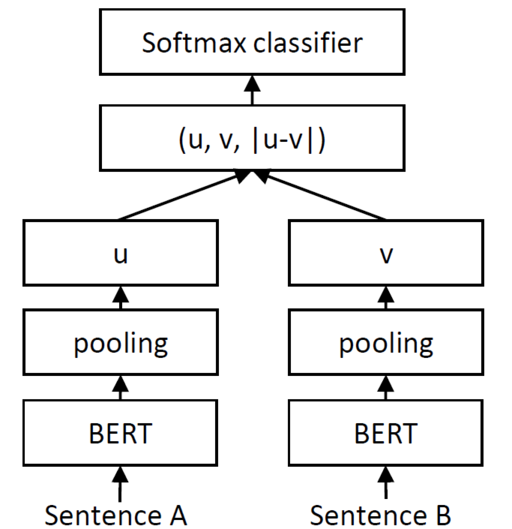

Tasks:

*   **[2 Point]** Prepare a training dataloader and training loop: Read in NLI data, tokenize and generate the corresponding data loader
*   **[2 Point]** BertClassifier: Construct a model that uses above method. Please follow the architecture illustrated in the given figure.

**Download NLI dataset**

This dataset includes:
*   Sentence pairs: (sentence1, sentence2)
*   Label: (contradiction, entailment, neutral)
*   Split: train, dev, test

In [ ]:
!wget 'https://sbert.net/datasets/AllNLI.tsv.gz'

--2023-10-01 20:44:02--  https://sbert.net/datasets/AllNLI.tsv.gz
Resolving sbert.net (sbert.net)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3121::, ...
Connecting to sbert.net (sbert.net)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/AllNLI.tsv.gz [following]
--2023-10-01 20:44:02--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/AllNLI.tsv.gz
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40794454 (39M) [application/octet-stream]
Saving to: ‘AllNLI.tsv.gz.1’

AllNLI.tsv.gz.1     100%[===================>]  38.90M   154MB/s    in 0.3s    

2023-10-01 20:44:03 (154 MB/s) - ‘

In [ ]:
data = pd.read_csv('AllNLI.tsv.gz', nrows=5, compression='gzip', delimiter='\t', quoting=csv.QUOTE_NONE)
data.head()

,split,dataset,filename,sentence1,sentence2,label
0,train,SNLI,snli_1.0_train,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral
1,train,SNLI,snli_1.0_train,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction
2,train,SNLI,snli_1.0_train,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment
3,train,SNLI,snli_1.0_train,Children smiling and waving at camera,They are smiling at their parents,neutral
4,train,SNLI,snli_1.0_train,Children smiling and waving at camera,There are children present,entailment


In [ ]:
from nlp_lib.dataset_utils import load_nli_dataset, tokenize_sentence_pair_nli_dataset, get_nli_dataloader
from nlp_lib.models.bert_classifier import BertClassifier
from nlp_lib.train_utils import train_loop_bert_classifier


**Training**

In [ ]:
#INFO: model and training configs
model_name = 'prajjwal1/bert-tiny'
num_epochs = 3
batch_size = 8
num_labels = 3
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_config = {"hidden_size": 128, "num_attention_heads": 2, "num_hidden_layers": 2, "intermediate_size": 512, "vocab_size": 30522}
bert_path = 'bert_tiny.bin'

#INFO: load nli dataset
nli_dataset = load_nli_dataset('AllNLI.tsv.gz')

#INFO: tokenize dataset
#WARNING: Use only first 50000 samples and maximum sequence length of 128
tokenized_train = tokenize_sentence_pair_nli_dataset(nli_dataset['train'][:50000], tokenizer, device, max_length=128)

#INFO: generate train_dataloader
train_dataloader = get_nli_dataloader(tokenized_train, batch_size=batch_size, shuffle=True)

# ########################################################################
# Switch to this block for HuggingFace's implementation of BERT model
# ########################################################################
# from nlp_lib.models.bert_hf import load_custom_configured_hf_bert
# bert = load_custom_configured_hf_bert('bert_tiny.bin', device)

# Pearson correlation: 0.43
# Spearman correlation: 0.34
# #########################################################

#TODO: Create a BertClassifier with required parameters
bert_config = {"hidden_size": 128, "num_attention_heads": 2, "num_hidden_layers": 2, "intermediate_size": 512, "vocab_size": 30522}
bert = Bert(bert_config).load_model('bert_tiny.bin')

# Pearson correlation: 0.41
# Spearman correlation: 0.32

bert_classifier = BertClassifier(bert, bert_config["hidden_size"], num_labels)

#INFO: create optimizer and run training loop
optimizer = AdamW(bert_classifier.parameters(), lr=5e-5)
train_loop_bert_classifier(bert_classifier, optimizer, train_dataloader, num_epochs, device)

This is the custom Bert model being used


  0%|          | 0/6250 [00:00<?, ?it/s]

Epoch: 1/3, Loss: 0.8986506065464019


  0%|          | 0/6250 [00:00<?, ?it/s]

Epoch: 2/3, Loss: 0.7181146187472344


  0%|          | 0/6250 [00:00<?, ?it/s]

Epoch: 3/3, Loss: 0.6433571647179127


**Evaluation**

Expected result:

Pearson correlation: 0.37

Spearman correlation: 0.42

In [ ]:
# TODO: run evaluation loop
bert = bert.to(device)
result_from_classification = eval_loop(bert_classifier, tokenizer, test_dataloader, device, model_type="classifier")
print(f'\nPearson correlation: {result_from_classification[0]:.2f}\nSpearman correlation: {result_from_classification[1]:.2f}')


Pearson correlation: 0.41
Spearman correlation: 0.32


# **Coding Challenge Part 4: Learning sentence embedding using a contrastive approach based on NLI dataset [3 Points]**

**Please DO NOT use additional library except the ones that are imported!!**

In this part, you are asked to explore another method that leverages a contrastive approach using NLI dataset.

Tasks **[3 Points]** :

*   Generate a dataloader if this is required for your approach
*   Construct a BERT based model using a contrastive method

In [ ]:
from transformers import BertConfig

from nlp_lib.models.bert_contrastive import BertContrastive
from nlp_lib.train_utils import train_loop_bert_contrastive
from nlp_lib.dataset_utils import adjust_labels_for_contrastive_loss

from nlp_lib.dataset_utils import load_nli_dataset, tokenize_sentence_pair_nli_dataset, get_nli_dataloader
from nlp_lib.eval_utils import eval_loop

**Training**

In [ ]:
import os

#INFO: model and training configs
model_name = 'prajjwal1/bert-tiny'
num_epochs = 3
train_batch_size = 8
num_labels = 3
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_config = {"hidden_size": 128, "num_attention_heads": 2, "num_hidden_layers": 2, "intermediate_size": 512, "vocab_size": 30522}
bert_path = 'bert_tiny.bin'

# ########################################################################
# Switch to this block for HuggingFace's implementation of BERT model
# ########################################################################
# from nlp_lib.models.bert_hf import load_custom_configured_hf_bert
# bert = load_custom_configured_hf_bert('bert_tiny.bin', device)

# Pearson correlation: 0.25
# Spearman correlation: 0.21
# # #########################################################


#WARNING: Change this code if you implemented a different nli loader for this part
nli_dataset = load_nli_dataset('AllNLI.tsv.gz')

#INFO: tokenize dataset
#WARNING: Use only first 50000 samples and maximum sequence lenght of 128
tokenized_train = tokenize_sentence_pair_nli_dataset(nli_dataset['train'][:50000], tokenizer, device, max_length=128)
# Added
tokenized_train = {key: tensor.to(device) for key, tensor in tokenized_train.items()}
tokenized_train = adjust_labels_for_contrastive_loss(tokenized_train)

#INFO: generate train_dataloader
train_dataloader = get_nli_dataloader(tokenized_train, batch_size=train_batch_size)

#TODO: Create a BertContrastive with required parameters
bert = Bert(bert_config).load_model('bert_tiny.bin')
bert_contrastive = BertContrastive(bert, bert_config["hidden_size"])
# Pearson correlation: 0.30
# Spearman correlation: 0.28

#INFO: create optimizer and run training loop
optimizer = AdamW(bert_contrastive.parameters(), lr=5e-5)
# train_loop(bert_contrastive, optimizer, train_dataloader, num_epochs, device)
train_loop_bert_contrastive(bert_contrastive, optimizer, train_dataloader, num_epochs, device)

This is the custom Bert model being used


  0%|          | 0/4171 [00:00<?, ?it/s]

Epoch: 1/3, Loss: 0.14224985960332417


  0%|          | 0/4171 [00:00<?, ?it/s]

Epoch: 2/3, Loss: 0.08433408683576306


  0%|          | 0/4171 [00:00<?, ?it/s]

Epoch: 3/3, Loss: 0.06626746792692778


**Evaluation**

In [ ]:
#TODO: run evaluation loop
bert = bert.to(device)
result_from_contrastive = eval_loop(bert_contrastive, tokenizer, test_dataloader, device, model_type="contrastive")
print(f'\nPearson correlation: {result_from_contrastive[0]:.2f}\nSpearman correlation: {result_from_contrastive[1]:.2f}')


Pearson correlation: 0.30
Spearman correlation: 0.28


# **Coding Challenge Part 5: Comparison [1 Point]**

In the final part of the coding challenge, you are asked to compare the result of pretrained BERT, classification based BERT, and contrastive method based BERT.

These are the tasks **[1 Point]**:


*   Plot the result for each model
*   Explain the difference between methods and their impact on the result and comparison

**Answer**



* Performance metrics for three BERT variations: pretrained BERT, BERT tailored for classification, and BERT utilizing contrastive methods.

* For each of these models, sharing results for two versions: one using the Huggingface BERT framework and the other using a custom BERT implementation. Both versions are configured identically and are initialized using the same pretrained weights from the 'tiny_bert.bin' file.

----

**Comparison based on the results for Huggingface BERT:**

pearson_hf = [0.42, 0.43, 0.25]
spearman_hf = [0.44, 0.34, 0.21]

----

**Pretrained BERT:**
- Utilizes a pretrained BERT model without additional task-specific training.
- Demonstrates the power of transfer learning: general language understanding from pretraining helps with the STS task.
- Achieves fairly close Pearson and Spearman scores:
  - **Pearson**: 0.42
  - **Spearman**: 0.44
- Implication: Model captures both linear relationships and rank order between embeddings.

-------

**BertClassifier :**
- **Architecture:**
  - Uses BERT embeddings for sentence representations.
  - Combines embeddings using concatenation and their absolute difference.
  - Passes resultant tensor through a classifier.
- **Performance:**
  - Pearson: 0.43
  - Spearman: 0.34.
- **Analysis:**
  - Drop in Spearman's correlation might be due to added complexity.
  - Model may be influenced by outliers or noise in the dataset.

--------

**BertContrastive :**
- **Architecture:**
  - Uses BERT for sentence embeddings.
  - Computes contrastive loss between sentence pair embeddings.
- **Performance:**
  - Pearson: 0.25
  - Spearman: 0.21.
- **Analysis:**
  - Lower performance on STS dataset.
  - **Leaving out data labeled as "neutral", decreases the training data size and might remove important context**.
  * Improvement: [use the MultipleNegativesRankingLoss](https://www.sbert.net/docs/package_reference/losses.html#multiplenegativesrankingloss)
   - **Input Format**:
    - Pairs of sentences: (a_1, p_1), (a_2, p_2), ..., (a_n, p_n), where each pair (a_i, p_i) is a positive pair.
    - Optional hard negatives: (a_1, p_1, n_1), (a_2, p_2, n_2), where n_1 and n_2 are hard negative examples for respective pairs.

    - **Negative Sampling**:
      - For each anchor `a_i`, all other `p_j` (for i ≠ j) are used as negative examples.
      - If provided, hard negatives `n_i` are also used as negative examples for corresponding anchor-positive pairs.


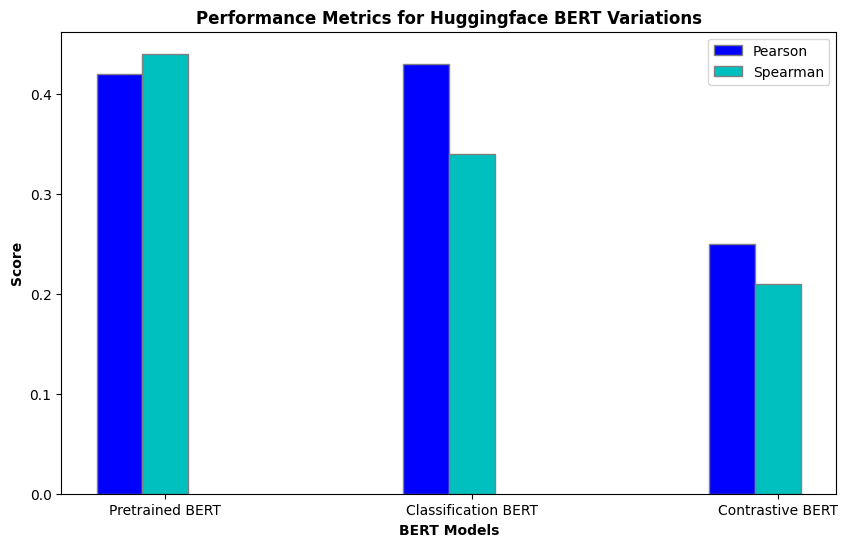

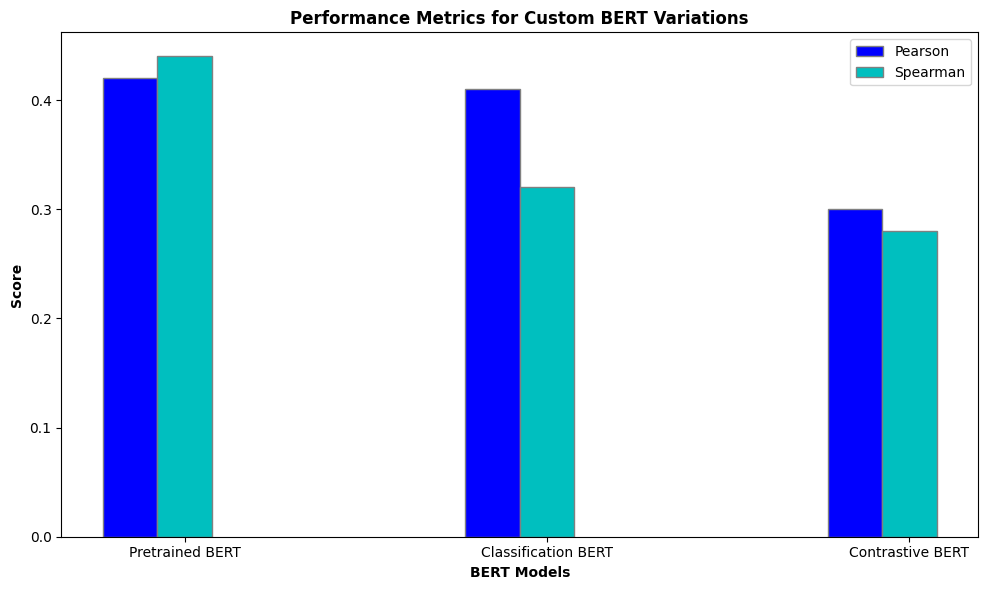

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Pretrained BERT', 'Classification BERT', 'Contrastive BERT']

# Pearson and Spearman scores for Huggingface
pearson_hf = [0.42, 0.43, 0.25]
spearman_hf = [0.44, 0.34, 0.21]

# Pearson and Spearman scores for Custom BERT
pearson_custom = [0.42, 0.41, 0.30]
spearman_custom = [0.44, 0.32, 0.28]

barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]

# Plot for Huggingface BERT
plt.figure(figsize=(10,6))
plt.bar(r1, pearson_hf, color='b', width=barWidth, edgecolor='grey', label='Pearson')
plt.bar(r2, spearman_hf, color='c', width=barWidth, edgecolor='grey', label='Spearman')
plt.title('Performance Metrics for Huggingface BERT Variations', fontweight='bold')
plt.xlabel('BERT Models', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(pearson_hf))], models)
plt.legend()
plt.show()

# Plot for Custom BERT
plt.figure(figsize=(10,6))
plt.bar(r1, pearson_custom, color='b', width=barWidth, edgecolor='grey', label='Pearson')
plt.bar(r2, spearman_custom, color='c', width=barWidth, edgecolor='grey', label='Spearman')
plt.title('Performance Metrics for Custom BERT Variations', fontweight='bold')
plt.xlabel('BERT Models', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(pearson_custom))], models)
plt.legend()
plt.tight_layout()
plt.show()


# **[OPTIONAL] Explore an alternative way to improve sentence encoder in terms of *performance* or *efficiency* [6 Points]**

Potential directions:
*   Improve the methodology to compute higher quality sentence embeddings  
*   Improve the efficiency during fine-tuning in terms of memory or training time
*   Use different machine learning methods that leverages other resources such as auxillary/teacher models
*   Use different datasets with other training objectives


**You can use any additional model, dataset, library or package for this part!!**

# Sentence Transformers

References
* https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models/
* https://huggingface.co/sentence-transformers/all-mpnet-base-v2
* https://discuss.huggingface.co/t/train-the-best-sentence-embedding-model-ever-with-1b-training-pairs/7354/21

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive/')

Mounted at /content/gdrive


In [ ]:
import json
import math
from collections import OrderedDict
import torch
from torch import nn, Tensor
from typing import Union, Tuple, List, Iterable, Dict
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import AdamW
from torch.utils.data import DataLoader
from scipy.stats import pearsonr, spearmanr
import numpy as np
import gzip, csv
import pandas as pd
from tqdm.auto import tqdm

torch.manual_seed(0)
np.random.seed(0)

In [ ]:
%pip install transformers
from transformers import AutoTokenizer, AutoModel

In [ ]:
# !wget https://sbert.net/datasets/stsbenchmark.tsv.gz

In [ ]:
# %pip install -U sentence-transformers

In [ ]:
from nlp_lib.dataset_utils import load_sts_dataset, tokenize_sentence_pair_sts_dataset_v2, collate_fn_v2, get_sts_dataloader_v2
from nlp_lib.eval_utils import eval_loop_v2

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')

model_all_mpnet_base_v2 = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model_all_mpnet_base_v2 = model_all_mpnet_base_v2.to(device)

#INFO: load dataset
sts_dataset = load_sts_dataset('stsbenchmark.tsv.gz')

#INFO: tokenize dataset
tokenized_test = tokenize_sentence_pair_sts_dataset_v2(sts_dataset['test'], tokenizer)

#INFO: generate dataloader
test_dataloader = get_sts_dataloader_v2(tokenized_test, batch_size=1)

result_from_all_mpnet_base_v2 = eval_loop_v2(model_all_mpnet_base_v2, tokenizer, test_dataloader, device, model_type="all_mpnet_base_v2")
print(f'\nPearson correlation: {result_from_all_mpnet_base_v2[0]:.2f}\nSpearman correlation: {result_from_all_mpnet_base_v2[1]:.2f}')

"""
Pearson correlation: 0.84
Spearman correlation: 0.83
"""


Pearson correlation: 0.84
Spearman correlation: 0.83


# Llama2 7B

In [ ]:
%pip install transformers
%pip install huggingface-cli
!huggingface-cli login


In [ ]:
%pip install transformers
from transformers import AutoTokenizer, AutoModel

In [ ]:
import json
import math
from collections import OrderedDict
import torch
from torch import nn, Tensor
from typing import Union, Tuple, List, Iterable, Dict
import torch.nn.functional as F
from torch.nn.parameter import Parameter
from torch.optim import AdamW
from torch.utils.data import DataLoader
from scipy.stats import pearsonr, spearmanr
import numpy as np
import gzip, csv
import pandas as pd
from tqdm.auto import tqdm

torch.manual_seed(0)
np.random.seed(0)

In [ ]:
def mean_pooling(model_output, attention_mask):
    # First element of model_output contains all token embeddings
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(
        -1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

def cosine_sim(a, b):
    dot_product = torch.mm(a, b.t())
    norm_a = a.norm(dim=1).unsqueeze(1)
    norm_b = b.norm(dim=1).unsqueeze(0)
    # Adding a small value to the denominator to prevent division by zero
    return dot_product / (norm_a * norm_b + 1e-7)

def eval_loop_v2(model, tokenizer, eval_dataloader, device, model_type="bert"):
    model.eval()
    all_scores = []
    all_cosine_similarities = []

    sep_token_id = tokenizer.sep_token_id

    for batch in eval_dataloader:
        if model_type == "all_mpnet_base_v2" or model_type == "llama_2":
            input_ids_1 = batch["input_ids_1"].to(device)
            attention_mask_1 = batch["attention_mask_1"].to(device)
            input_ids_2 = batch["input_ids_2"].to(device)
            attention_mask_2 = batch["attention_mask_2"].to(device)
        else:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
        scores = batch["score"].to(device)

        token_type_ids = batch.get("token_type_ids")
        if token_type_ids is not None:
            token_type_ids = token_type_ids.to(device)

        with torch.no_grad():

            # Use the flag to determine output type
            if model_type == "classifier":
                outputs = model(input_ids=input_ids, attention_mask=attention_mask,
                                return_embeddings=True if model_type == "classifier" else False)
                embedding1, embedding2 = outputs
            elif model_type == "bert":
                outputs = model(input_ids=input_ids,
                                attention_mask=attention_mask)
                embeddings = outputs[0]
                sep_indices = (input_ids == sep_token_id).nonzero(
                    as_tuple=True)[1]
                embedding1 = embeddings[:, :sep_indices[0]].mean(dim=1)
                embedding2 = embeddings[:, sep_indices[0] +
                                        1:sep_indices[1]].mean(dim=1)
            elif model_type == "contrastive":
                embedding1, embedding2 = model(
                    input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, return_embeddings=True)

            elif model_type == "all_mpnet_base_v2" or model_type == "llama_2":
                embeddings_1 = model(input_ids=batch['input_ids_1'].to(
                    device), attention_mask=batch['attention_mask_1'].to(device))
                embeddings_2 = model(input_ids=batch['input_ids_2'].to(
                    device), attention_mask=batch['attention_mask_2'].to(device))

                sentence_embeddings_1 = mean_pooling(
                    embeddings_1, batch['attention_mask_1'].to(device))
                sentence_embeddings_2 = mean_pooling(
                    embeddings_2, batch['attention_mask_2'].to(device))

                # Normalize embeddings
                embedding1 = F.normalize(sentence_embeddings_1, p=2, dim=1)
                embedding2 = F.normalize(sentence_embeddings_2, p=2, dim=1)

            else:
                raise ValueError(f"Unknown model_type: {model_type}")

            cosine_sim_values = cosine_sim(embedding1, embedding2).diagonal()
            all_cosine_similarities.extend(cosine_sim_values.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    eval_pearson_cosine = pearsonr(all_scores, all_cosine_similarities)[0]
    eval_spearman_cosine = spearmanr(all_scores, all_cosine_similarities)[0]

    return [eval_pearson_cosine, eval_spearman_cosine]

In [ ]:
from nlp_lib.dataset_utils import load_sts_dataset, tokenize_sentence_pair_sts_dataset_v2, collate_fn_v2, get_sts_dataloader_v2
# from nlp_lib.eval_utils import eval_loop_v2

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load model from HuggingFace Hub
tokenizer_llama_2 = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-chat-hf')

model_llama_2 = AutoModel.from_pretrained('meta-llama/Llama-2-7b-chat-hf')
model_llama_2 = model_llama_2.to(device)

#INFO: load dataset
sts_dataset = load_sts_dataset('stsbenchmark.tsv.gz')

tokenizer_llama_2.pad_token = tokenizer_llama_2.eos_token

#INFO: tokenize dataset
tokenized_test = tokenize_sentence_pair_sts_dataset_v2(sts_dataset['test'], tokenizer_llama_2)

#INFO: generate dataloader
test_dataloader = get_sts_dataloader_v2(tokenized_test, batch_size=1)

result_from_model_llama_2 = eval_loop_v2(model_llama_2, tokenizer_llama_2, test_dataloader, device, model_type="llama_2")
print(f'\nPearson correlation: {result_from_model_llama_2[0]:.2f}\nSpearman correlation: {result_from_model_llama_2[1]:.2f}')

"""
Pearson correlation: 0.49
Spearman correlation: 0.48
"""

## Efficiency during finetuning



* **Pruning**: Can be used to remove less important neurons or connections, reducing the model size and speeding up training without a significant loss in performance.
* **Quantization**: It allows for the reduction of the precision of the weights and biases, reducing memory requirements and speeding up training and inference.

## Dynamic Quantization applied to pretrained Bert

* Dynamic quantization only quantizes the weights, and it does so post-training.
* It's a lightweight way to get the benefits of quantization without the complexity of training with quantization.

In [ ]:
### RUN the below with CPU backend


from transformers import AutoModel, AutoTokenizer, BertConfig
import os
import torch
import torch.nn as nn
from torch.quantization import quantize_dynamic

from nlp_lib.dataset_utils import load_sts_dataset, tokenize_sentence_pair_sts_dataset, get_sts_dataloader
from nlp_lib.eval_utils import eval_loop

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

#INFO: model and tokenizer
model_name = 'prajjwal1/bert-tiny'
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Get the loaded model
from nlp_lib.models.bert_hf import load_custom_configured_hf_bert
bert = load_custom_configured_hf_bert('bert_tiny.bin', device)

# Quantize the model dynamically
bert_quantized = quantize_dynamic(bert, {nn.Linear}, dtype=torch.qint8)

#INFO: load dataset
sts_dataset = load_sts_dataset('stsbenchmark.tsv.gz')

#INFO: tokenize dataset
tokenized_test = tokenize_sentence_pair_sts_dataset(sts_dataset['test'], tokenizer)

#INFO: generate dataloader
test_dataloader = get_sts_dataloader(tokenized_test, batch_size=1)

#INFO: run evaluation loop
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
bert = bert.to(device)
results_from_pretrained = eval_loop(bert_quantized, tokenizer, test_dataloader, device)

print(f'\nPearson correlation: {results_from_pretrained[0]:.2f}\nSpearman correlation: {results_from_pretrained[1]:.2f}')

# Pearson correlation: 0.41
# Spearman correlation: 0.44


Model Size Measurement:
* To measure the model size, we can save the model to disk and then check the file size.

In [ ]:
# Before quantization
torch.save(bert.state_dict(), "before_quantization.pth")
size_before_quantization = os.path.getsize("before_quantization.pth")

# After quantization
torch.save(bert_quantized.state_dict(), "after_quantization.pth")
size_after_quantization = os.path.getsize("after_quantization.pth")

print(f"Size before quantization: {size_before_quantization / (1024 ** 2):.2f} MB")
print(f"Size after quantization: {size_after_quantization / (1024 ** 2):.2f} MB")

# Size before quantization: 16.75 MB
# Size after quantization: 15.58 MB

Inference Speed Measurement:
* To measure the inference speed, we record the start and end times for inference with a certain number of inputs.

In [ ]:
import time


for batch in test_dataloader:
  input_ids_sample = batch["input_ids"].to(device)
  attention_mask_sample = batch["attention_mask"].to(device)
  break;

num_inferences = 1000
start_time = time.time()

for _ in range(num_inferences):
    with torch.no_grad():
        outputs = bert(input_ids_sample, attention_mask_sample)

end_time = time.time()
time_without_quantization = end_time - start_time

start_time = time.time()

for _ in range(num_inferences):
    with torch.no_grad():
        outputs = bert_quantized(input_ids_sample, attention_mask_sample)

end_time = time.time()
time_with_quantization = end_time - start_time

print(f"Time without quantization: {time_without_quantization:.4f} seconds")
print(f"Time with quantization: {time_with_quantization:.4f} seconds")

# Time without quantization: 12.3934 seconds
# Time with quantization: 10.8917 seconds


For the case of the "tiny" BERT model, the absolute gains might seem modest because:

* The model is already quite small, so there's less room for reduction.
* Dynamic quantization might not leverage the full potential speedup or size reduction possible with other methods like static quantization or quantization-aware training.
